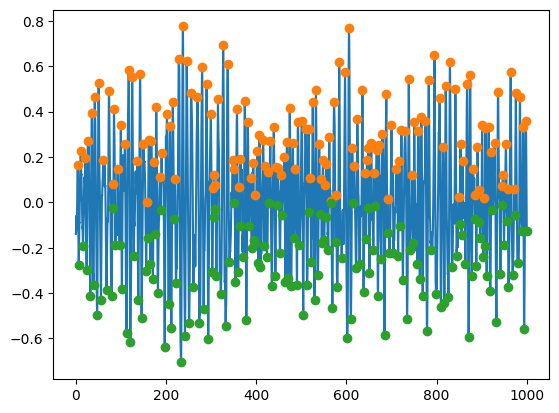

In [4]:
import wecopttool as wot
import matplotlib.pyplot as plt
import numpy as np
import mhkit 

f1 = 0.001
nfreq = 5000

Hs = 0.5
Tp = 10
fp = 1/Tp

spectrum_func = lambda f: wot.waves.pierson_moskowitz_spectrum(f, fp, Hs)
spectrum_name = "Pierson Moskowitz"

efth = wot.waves.omnidirectional_spectrum(f1, nfreq, spectrum_func, spectrum_name)
waves = wot.waves.long_crested_wave(efth)

waves_fd = wot.complex_to_real(waves.values, False)
waves_td = wot.time_mat(f1, nfreq, 1, False) @ waves_fd

time = wot.time(f1, nfreq)

t_p, peaks = mhkit.loads.extreme.global_peaks(time, waves_td.squeeze())
t_t, troughs = mhkit.loads.extreme.global_peaks(time, -waves_td.squeeze())
troughs *= -1

plt.plot(time, waves_td, '-')
plt.plot(t_p, peaks, 'o')
plt.plot(t_t, troughs, 'o')

In [5]:
4 * np.std(waves_td), 2 * np.std(waves_td), 4*np.std(np.concatenate([peaks, troughs])), 4*np.std(peaks)

(0.9999999001803173,
 0.49999995009015863,
 1.368410152371446,
 0.7132032054507706)

In [6]:
np.mean(np.sort(peaks)[-int(len(peaks)/3):])

0.5145870302114798